In [3]:
import numpy as np
import pandas as pd
import re 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from scipy import optimize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
import string
from scipy.io import loadmat
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from utils import data_splitter,text_process,count_freqs
import sklearn as sk

C:\Users\Lales\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Lales\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
X_train, X_test, y_train, y_test,train_lab,test_lab = data_splitter('resources/dataset.csv')

## Vectorization

In [7]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)
text_bow_train = bow_transformer.transform(X_train)
text_bow_test = bow_transformer.transform(X_test)

## TFIDF

In [8]:
tfidf_transformer = TfidfTransformer().fit(text_bow_train)
text_tfidf_train=tfidf_transformer.transform(text_bow_train)
text_tfidf_test=tfidf_transformer.transform(text_bow_test)
print(text_tfidf_train.shape)

(160000, 48200)


In [16]:
svc=SVC()
svc.fit(text_bow_train, y_train)


SVC()

In [18]:
y_pred=svc.predict(text_bow_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     20000
         1.0       0.91      0.91      0.91     20000

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



In [20]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(2), range(2))
    plt.xticks(range(2), range(2))
    plt.colorbar();
    for i in range(2):
        for j in range(2):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

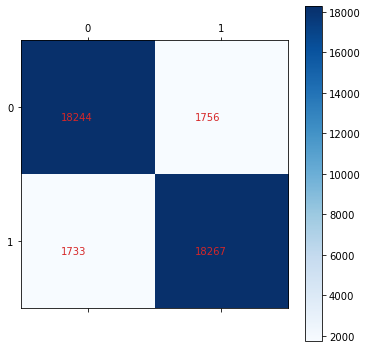

In [21]:
plot_confusion_matrix(y_test, y_pred)